# **Session 1: Foundations of Machine Learning - Part One**
This session introduces the foundations of machine learning. Specifically it will outline the core components of machine learning problems. Some examples will be given to help reinforce these concepts. This step is necessary to be able to gain an intuition for working in deep learning models.


## Resources
Throughout this course we will be using python as our main coding language, for those unfamiliar with python you can find the following tutorials
1. https://www.youtube.com/watch?v=kqtD5dpn9C8
2. https://docs.python.org/3/tutorial/index.html

Additionally we will also be using Pytorch exclusively. It is recommended that you get an idea of the basics of matrix and tensor data storage using Pytorch and NumPy:
1. https://numpy.org/doc/stable/user/absolute_beginners.html
2. https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html


---


In [ ]:
# --- set up our imports for this session ---
from google.colab import output
output.enable_custom_widget_manager()

import torch
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
import ipywidgets as widgets

## **AI vs Machine Learning vs Deep Learning**

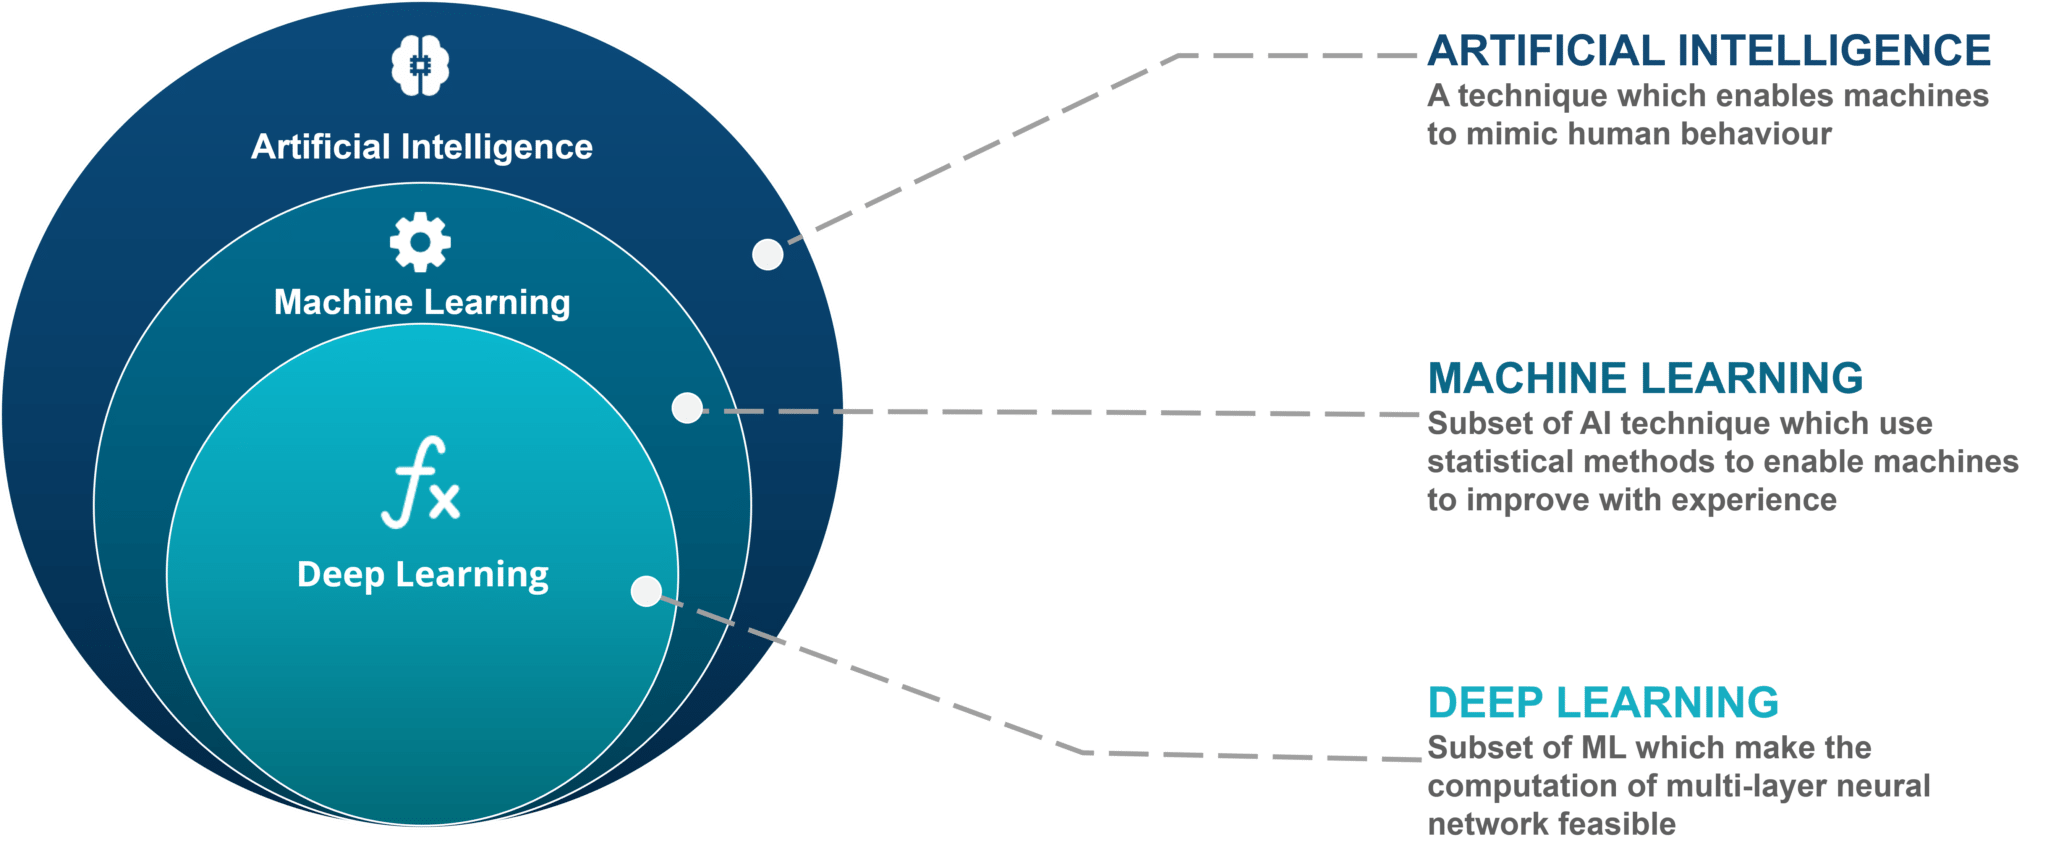



## **What is Machine Learning?**
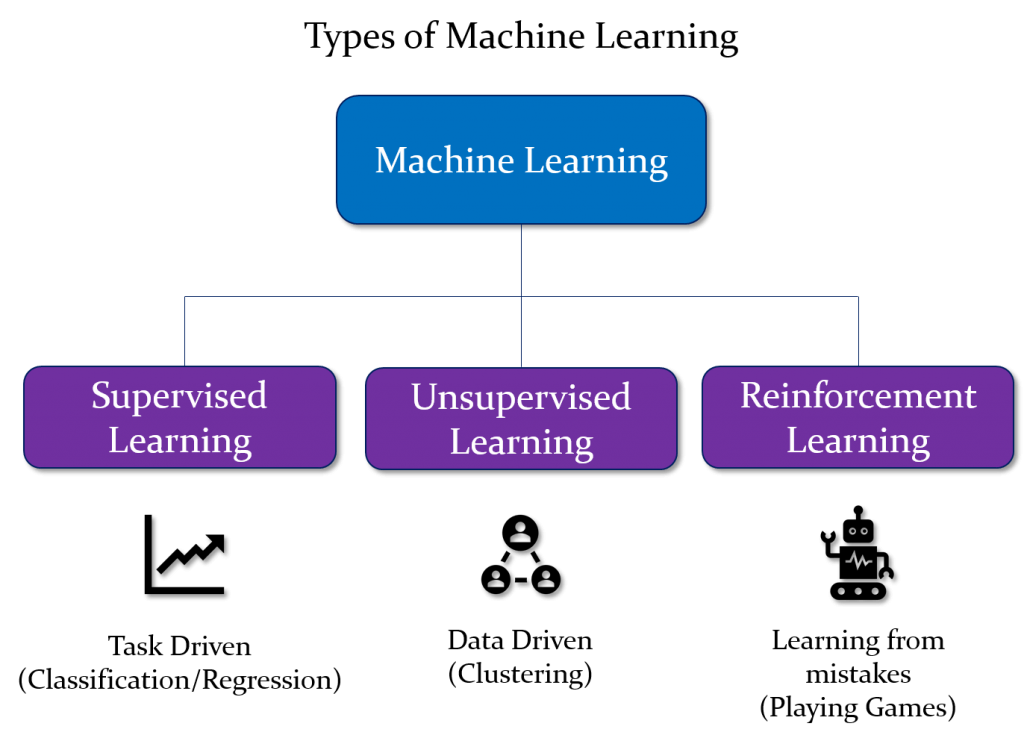

Machine learning can be broken down into a few subsets:


1.   Supervised learning - Learning with labeled data.
2.   Unsupervised learning - Learning with unlabeled data.
3.   Reinforcement learning - Learning through actions and rewards.

We will be focusing on supervised learning for the first part of this course.


---



### *Supervised Learning*


All supervised machine learning problems can be boiled down to the following points:


- At the core of the problem is a "model" which is always just a function,
$\hat{y} = f(x, \theta)$.
 - The function is always parameterized, i.e uses a set of parameters, $\theta$, along with input information, $x$, to compute the approximate outputs, $\hat{y}$.
- Given a dataset $D$ that implicitly provides the relationship, $y = f_{actual}(x)$, between the inputs, $x$, and actual outputs, $y$, the goal is to determine, or "learn", the parameters, $\theta$, such that the approximate outputs, $\hat{y}$, are as close as possible to the actual outputs, $y$.
  - The instances within the dataset are just pairs of input data and labels, $D = \{(x_0, y_0), (x_1, y_1), ..., (x_N, y_N)\}$.


***If you ever get confused as to why we are doing something, just remember our ultimate goal is to minimize the difference between the actual outputs, $y$, and our models predicted outputs, $\hat{y}$, by adjusting the parameters, $\theta$, of our model.***




### *What are the Components of Supervised Machine Learning?*
To learn the parameters, $\theta$, a few things are needed.


1.  A model, $\hat{y} = f(x, \theta)$ as mentioned before.
2.  A function to compare the predicted output, $\hat{y}$, with the actual output, $y$. This function is called the *loss function*, $L(\theta, D)$.
3.  A method to update the parameters, $\theta$, such that the loss function is minimized, i.e. $L(\theta, D) = 0$.


The key to understanding the following sections is realizing that as our loss function approaches zero, $L(\theta, D) → 0$, our predicted outputs should approach the actual outputs, $\hat{y} → y$. **In other words the loss function will mathematically represent our overall goal.**


### *How to Update $\theta$ to Minimize the Loss?*
To be able to minimize our loss (the output of the loss function), and therefore achieve our overall goal, we need a way to manipulate our parameters, $\theta$. For almost all problems we will face in supervised, and even unsupervised, machine learning we will use some variant of a method called ***gradient descent***.



## **Gradient Descent**
Gradient descent is an iterative method to update our set of parameters by relating how the change in parameters, $\Delta \theta$, changes the result of the loss function, $\Delta L(\theta, D)$. Another way of saying this is how sensitive is our loss function relative to our parameters. Some primers are needed here before going into the maths.


*  $\Delta$ is a symbol meaning the discrete change in a property - i.e. $\Delta \theta = \theta_{2} - \theta_{1}$.
*  $\partial$ is a symbol meaning the continuous change in a property, like the slope of a surface.
*  $\frac{\partial f}{\partial \theta}$ is how we mathematically represent the change in a property $f$ with respect to the change in another property $\theta$, i.g. sensitivity. This is also known as a partial derivative or a gradient.
*  Let's assume that the symbol $\theta$ is actually a list of $k$ separate parameters, $\theta = [\theta_1, \theta_2, ..., \theta_k]$
*  Given a vector of parameters, $\theta$, the symbol $\nabla_{\theta}$ is a vector representation of the gradient operations. For example, $\nabla_{\theta} f(x, \theta) = [\frac{\partial f(x,\theta)}{\partial \theta_1}, \frac{\partial f(x,\theta)}{\partial \theta_2}, ..., \frac{\partial f(x, \theta)}{\partial \theta_k}]$ is just the vector, or list, of gradients of the function $f(x, \theta)$ for each individual parameter in the list of parameters, $\theta$.


For now this is only important to consider on a conceptual level, just think of the $\nabla_{\theta}$ operator as the thing that computes the slope along the loss function surface in the direction of each of the parameters. When the slope reaches zero in all directions that means that you've either reached a minimum or a maximum of a surface. This is exactly what we are looking for, the minimum of the loss function.





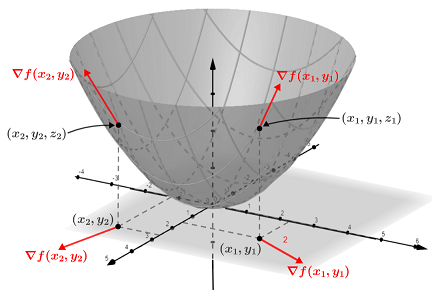

### *The Algorithm*
The gradient descent algorithm iterates over a number of steps. At each step it updates the parameters according to the following equation.

$\theta_{n+1} = \theta_{n} - \alpha_{n} \nabla_{\theta} L(\theta_{n}, D)$


1. $\alpha_{n}$ = learning rate at iteration step $n$. This controls the rate at which we update the parameters of our model. This parameter is of great importance as it controls the granularity at which we will search our parameter space for a solution. Too big and you'll overshoot the correct solution, too small and you'll never find it.
2. $\theta_{n}$ = The parameters at step $n$.
3. $L(\theta_{n}, D)$ = The loss function given the parameters at step $n$ and the dataset to train on, $D$.
4. $\nabla$ = The gradient operator, evaluated at a data point in the dataset $D$.


#### Terminology


1. Everytime the parameters are updated for the entire dataset, its called an ***epoch***.
2. The dataset can be broken up into smaller subsets for which the parameters can be updated multiple times in an epoch. These subsets are called ***batches***.


---



### *Example: Modeling a Sinusoidal Waveform*




In [ ]:
# --- set up our model and its gradients ---
def model(x, theta):
  """A 3-order polynomial approximation of the sinusoidal wave."""
  y_hat = theta[0] + theta[1] * x + theta[2] * torch.pow(x, 2) + theta[3] * torch.pow(x, 3)
  return y_hat

def model_derivative(x):
  """Derivative vector of the model wrt the parameters"""
  df_dtheta_0 = torch.ones_like(x)
  df_dtheta_1 = x
  df_dtheta_2 = torch.pow(x, 2)
  df_dtheta_3 = torch.pow(x, 3)
  return torch.stack([df_dtheta_0, df_dtheta_1, df_dtheta_2, df_dtheta_3], dim=0)

# --- set up the loss and its gradients ---
def loss_function(x, y, theta):
  """The loss function in terms of mean squared error."""
  y_hat = model(x, theta)
  l = torch.pow(y_hat - y, 2) # mean squared error
  return l.mean()

def gradient_of_loss(x, y, theta):
  """Gradient of the loss wrt to the parameters"""
  # --- get the derivatives of the model wrt the parameters ---
  d_dtheta = model_derivative(x)
  # --- get the main derivative of the loss function ---
  dloss = 2.0 * (model(x, theta) - y)  # derivative of (model - y)^2 = 2 * (model - y)* derivate_of_model
  # --- find the gradient of each parameter using the chain rule ---
  dloss_dtheta = torch.stack([dloss * d_dtheta[i, :] for i in range(len(d_dtheta))], dim=0)
  # --- summate the gradients for each data point ---
  dloss_dtheta_total = dloss_dtheta.sum(dim=1)

  return dloss_dtheta_total

Perform the gradient descent algorithm using a single batch of data.

Final parameters: [ 3.11802002e-03  8.50485631e-01 -5.27423613e-04 -9.20259109e-02], Loss: 0.0048


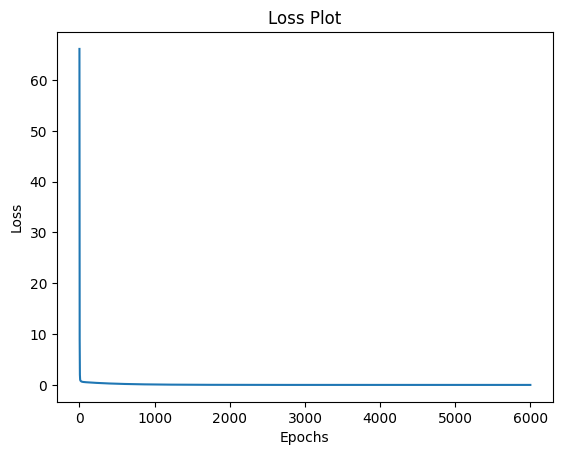

In [ ]:
# --- set up our training data ---
number_of_data_points = 100
x_data = torch.linspace(-np.pi, np.pi, number_of_data_points)
y_data = torch.sin(x_data)

# --- initialize our model parameters ---
theta_parameters = torch.randn(4, dtype=float) #makes a vector of size 4 of random variables

# --- set up gradient descent ---
number_of_epochs = 6000
learning_rate = 0.00001

# --- track the loss and history of theta ---
losses = []
theta_history = []

# --- perform gradient descent ---
for epoch in range(number_of_epochs):
  # --- compute the gradient of the loss ---
  epoch_dloss_dtheta = gradient_of_loss(x_data, y_data, theta_parameters)

  # --- update the parameters using gradient descent ---
  theta_parameters = theta_parameters - learning_rate * epoch_dloss_dtheta

  # --- update the trackers ---
  losses.append(loss_function(x_data, y_data, theta_parameters))
  theta_history.append(theta_parameters.numpy())

theta_history = np.array(theta_history)
# --- print the training details ---
print(f"Final parameters: {theta_parameters.numpy()}, Loss: {losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(number_of_epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()


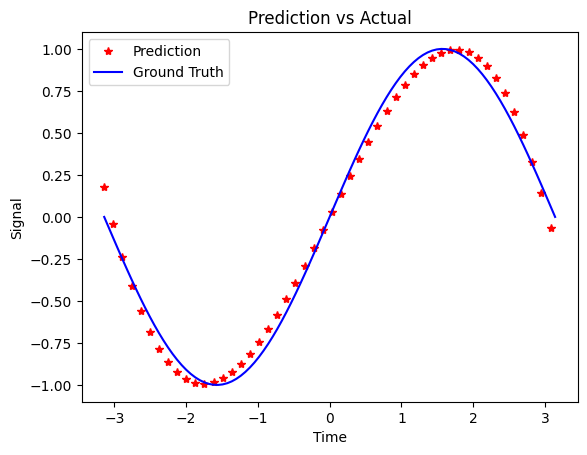

In [ ]:
# --- plot the prediction vs the actual ---
y_prediction = model(x_data, theta_parameters)

# --- plotting ---
plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
         y_prediction[torch.arange(0, number_of_data_points, 2)], "*r", label="Prediction")
plt.plot(x_data[:], y_data[:], "b", label="Ground Truth")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend()
plt.title("Prediction vs Actual")
plt.show()



---

#### Visualizing Gradient Descent
The following plot describes the trajectory of two ($\theta_1, \theta_2$) of the four parameters ($\theta_0, \theta_1, \theta_2, \theta_3$) for particular epochs during the training process. The contours (ellipse) represent values of $\theta_1$ and  $\theta_2$ where the value of the loss function is the same. The darker the color of the contour the lower the loss function is as displayed by the color bar on the right.

During each increasing epoch we can see that the pair of parameter values starts to descend to the contour with the minimum loss value, as shown by the direction of the arrows. This is what gives this technique its name - gradient descent.

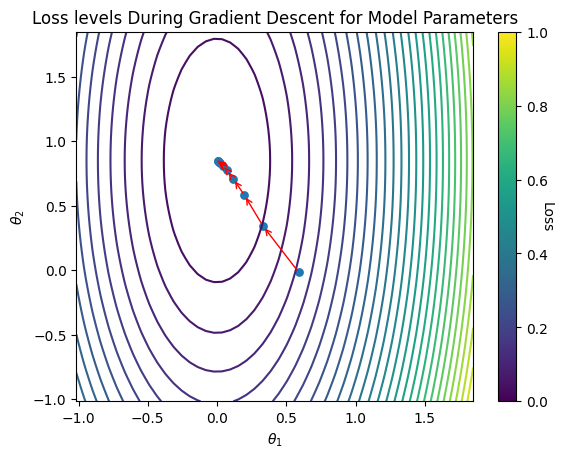

In [ ]:
# --- extract the desired epochs of data ---
theta_x = theta_history[torch.arange(0, number_of_epochs, 600), 0]
theta_y = theta_history[torch.arange(0, number_of_epochs, 600), 1]
# --- lets look at the loss level-set plot ---
parameter_grid = np.linspace(np.min([theta_x.min(), theta_y.min()]) - 1.0,
                             np.max([theta_x.max(), theta_y.max()]) + 1.0)
loss_grid = np.zeros((len(parameter_grid), len(parameter_grid)))
for i in range(len(parameter_grid)):
  for j in range(len(parameter_grid)):
    theta_parameters_plot = torch.tensor([theta_history[-1][0],
                                          parameter_grid[i],
                                          parameter_grid[j],
                                          theta_history[-1][3]])
    l_i = loss_function(x_data, y_data, theta_parameters_plot)
    loss_grid[i, j] = l_i

# --- plot the loss levels ---
X, Y = np.meshgrid(parameter_grid, parameter_grid)
plt.contour(X, Y, loss_grid, 30)

# --- plot the different solutions of theta over the optimizer steps ---
theta_x = theta_history[torch.arange(0, number_of_epochs, 600), 0]
theta_y = theta_history[torch.arange(0, number_of_epochs, 600), 1]
for i in range(1, len(theta_x)):
  plt.annotate('', xy=(theta_x[i], theta_y[i]), xytext=(theta_x[i-1], theta_y[i-1]),
               arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1}, va='center', ha='center')
plt.scatter(theta_x, theta_y, s=40, lw=0)

# --- label the plot ---
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.title("Loss levels During Gradient Descent for Model Parameters")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Loss', rotation=270)
plt.show()



---


## **Using Pytorch for Automatic Differentiation**

Pytorch allows for the automatic differentiation and the optimizer update to be handled behind the scenes. There are several different flavors of the gradient descent algorithm, which will be discussed in the next session, but for now assume that the ***Adam optimizer*** is generally the most robust. Let us perform the previous example with the use of Pytorch concepts.

We can observe that this code doesn't explicitly need knowledge of how to compute the gradients. This is taken care of for us during the `loss.backward()` function call, *we will discuss what this is doing in the next session as well*. This remains true for all models as long as we use pytorch functions and tensors to manipulate and hold our data.

We can also notice that the update step is taken care of for us during the `optimizer.step()` call. An additional step prior to calling the `loss.backward()` function is needed which is `optimizer.zero_grad()`. This is because Pytorch accumulates its gradient values and needs to be reset before the next update step to make sure the gradients aren't carried over from the previous epoch.

Loss: 0.0048


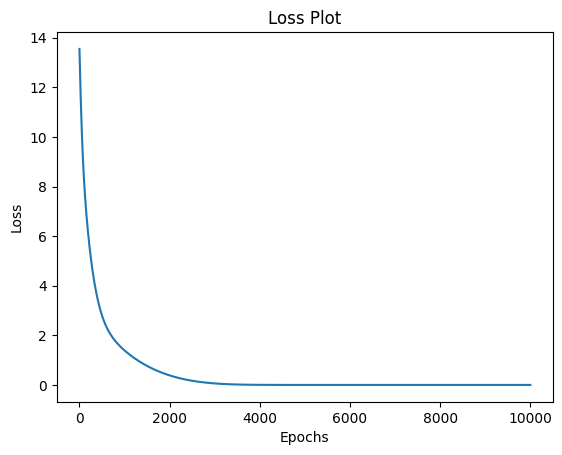

In [ ]:
class ApproximateSinWave(torch.nn.Module):
  """Class for approximating a sinusoidal wave. """

  def __init__(self):
    super().__init__()

    # --- parameters ---
    self.theta_0 = torch.nn.Parameter(torch.randn(1))
    self.theta_1 = torch.nn.Parameter(torch.randn(1))
    self.theta_2 = torch.nn.Parameter(torch.randn(1))
    self.theta_3 = torch.nn.Parameter(torch.randn(1))


  def forward(self, input_values: torch.Tensor) -> torch.Tensor:
    """We must override the forward function to produce the prediction. """
    z = self.theta_1 * input_values
    z += self.theta_2 * torch.pow(input_values, 2)
    z += self.theta_3 * torch.pow(input_values, 3)
    z += self.theta_0
    return z


# --- create the model ---
model = ApproximateSinWave()

# --- create the optimizer ---
number_of_epochs = 10000
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# --- put the model in training mode ---
model.train()

# --- create the trackers ---
losses = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
  # --- zero out the stored gradients ---
  optimizer.zero_grad()
  # --- compute the prediction ---
  y_prediction = model(x_data)
  # --- compute the loss ---
  loss = torch.pow(y_prediction - y_data, 2).mean()
  # --- perform the gradient computation on the loss ---
  loss.backward()
  # --- update the model through the optimizer ---
  optimizer.step()

  # --- update the trackers ---
  losses.append(loss.item())

# --- print the training details ---
print(f"Loss: {losses[-1]:.4f}")

# --- plot the loss over epochs ---
plt.plot(np.arange(number_of_epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

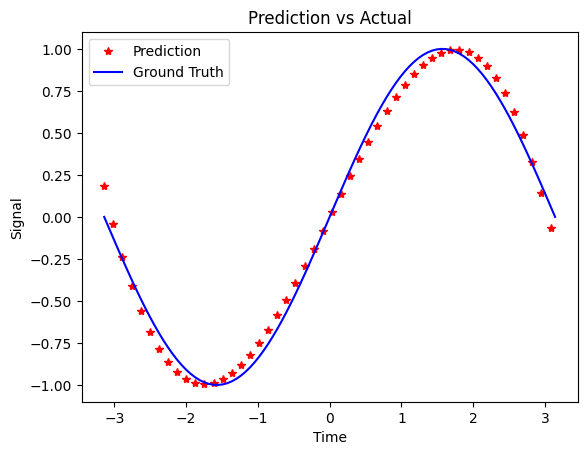

In [ ]:
# --- take the model out of training mode ---
model.eval()

# --- plot the prediction vs the actual ---
y_prediction = model(x_data)
with torch.no_grad():
  # --- plotting ---
  plt.plot(x_data[torch.arange(0, number_of_data_points, 2)],
          y_prediction[torch.arange(0, number_of_data_points, 2)].numpy(), "*r", label="Prediction")
  plt.plot(x_data[:], y_data[:], "b", label="Ground Truth")
  plt.xlabel("Time")
  plt.ylabel("Signal")
  plt.legend()
  plt.title("Prediction vs Actual")
  plt.show()

## **Supervised Learning Applications**
There are two main branches of applications in the realm of supervised learning: *Regression* and *Classification*.

### *Regression*

A regression problem is when a model is used to predict continuous outcomes or values. This could be a model that localizes a robot's location from input images, or predicts what a weld will look like from welding commands. The model is trained on labeled input and output data to understand the strength of relationships between data features and the output.


### *Classification*

Classification is when a model is trained to categorize an object based on its features. This could include predicting if a robot's pose is in collision, or whether a pixel in an image is part of a seam. A model will be trained on labeled input and output data to understand the specific features which classify a labeled object.
Think of classification as taking inputs (features) and categorizing them into discrete bins. Every classification problem has two or more bins. When there are only two bins then its called ***Binary Classification***.





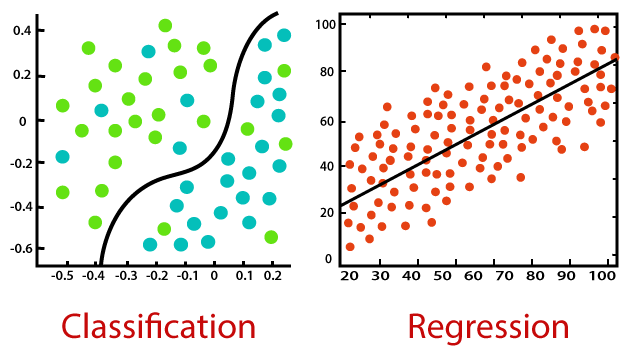





---
### **Linear Regression**


The purpose of linear regression is to fit a hyperplane (i.g. a line in 2D) to a dataset, $D$, with $N$ samples to produce a continuous variable. The model is simply:


$ \hat{y_i} = \bar{x_i}\theta^T + b$




*for all* $i \in \{1, ..., N\}$


1. $y_i$ = scalar output - dependent variable
2. $\bar{x_i}$ = $(1 \times k)$ row vector of independent variables
3. $\theta$ = $(k \times 1)$ column vector of parameters
4. $b$ = a scalar constant bias. We will talk about what a bias does and why it is needed in the next session.




The loss function used for regression is generally the mean squared error loss:


$L_{MSE} = \frac{1}{N} \sum_i^N(y_i - \hat{y_i})^2 $




#### Terminology
1. The symbol $\sum_i^N f_i$ simply means the sum of the expression $f_i$ for all $i$ instances of the data from 1 to N, i.e. $\sum_i^N f_i = f_1 + f_2 + ... + f_N$.




---






Pytorch generally has most loss functions we need contained in its library. In this case its found using:




```
loss_function = torch.nn.MSELoss()
```


We will start to see a pattern here in the next example that the training routine will become basically identical when training different models using the Pytorch schema.







Training Stopped on Epoch 9999: Loss: 0.8543, Slope: [[0.9930836]] Intercept: [1.1387972]


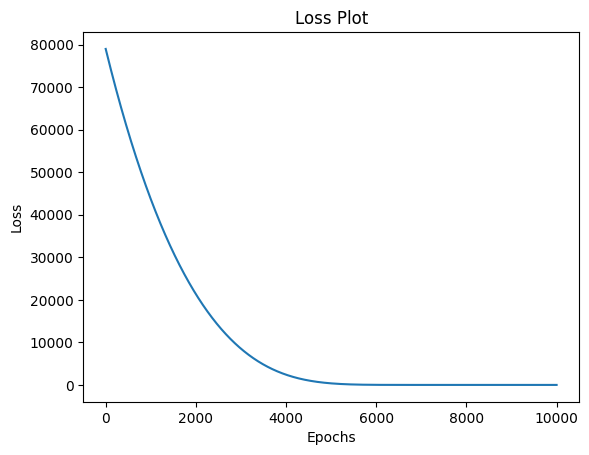

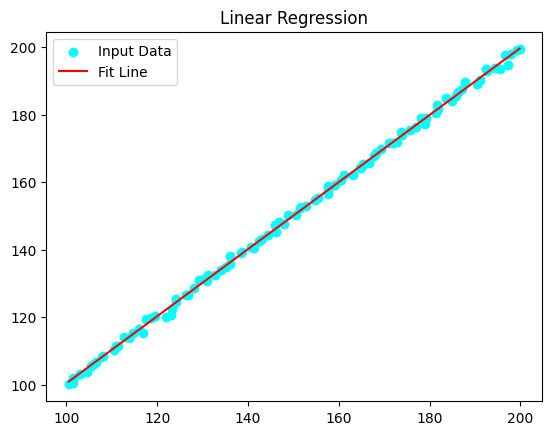

In [ ]:
class LinearModel(torch.nn.Module):
  """Linear regression layer. """

  def __init__(self, num_inputs: int, num_outputs: int):
    super().__init__()

    # --- linear parameters ---
    self.theta = torch.nn.Parameter(torch.randn((num_outputs, num_inputs))) # a matrix with num_outputs rows and num_input columns
    self.bias = torch.nn.Parameter(torch.randn(num_outputs))

  def forward(self, input_values: torch.Tensor) -> torch.Tensor:
    """Compute the forward prediction of the model, y = x*theta^T + b. """
    return torch.matmul(input_values, self.theta.t()) + self.bias

# --- create a toy dataset ---
number_of_data_points = 100
noise = 0.6
x_linear_data = np.linspace(1.0, 2.0, number_of_data_points) * 100 + np.random.normal(np.zeros(number_of_data_points), noise)
y_linear_data = np.linspace(1.0, 2.0, number_of_data_points) * 100 + np.random.normal(np.zeros(number_of_data_points), noise)

x_min = np.min(x_linear_data)
x_max = np.max(x_linear_data)

# --- convert into pytorch tensor ---
x_linear_data = torch.tensor(x_linear_data).unsqueeze(1).float()
y_linear_data = torch.tensor(y_linear_data).float()

# --- create the model ---
model = LinearModel(1, 1)

# --- create the loss function ---
loss_function = torch.nn.MSELoss()

# --- create the optimizer ---
number_of_epochs = 10000
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
acceptable_loss = 0.8

# --- put the model in training mode ---
model.train()

# --- create the trackers ---
losses = []
# --- perform gradient descent ---
for epoch in range(number_of_epochs):
  # --- zero out the stored gradients ---
  optimizer.zero_grad()
  # --- compute the prediction ---
  y_prediction = model(x_linear_data).squeeze(1)
  # --- compute the loss ---
  loss = loss_function(y_prediction, y_linear_data)
  # --- perform the gradient computation on the loss ---
  loss.backward()
  # --- update the model through the optimizer ---
  optimizer.step()

  # --- update the trackers ---
  losses.append(loss.item())

  # --- stop early if loss is acceptable ---
  if loss.item() < acceptable_loss:
    break

with torch.no_grad():
  # --- print the training details ---
  print(f"Training Stopped on Epoch {epoch}: Loss: {losses[-1]:.4f}, Slope: {model.theta.numpy()} Intercept: {model.bias.numpy()}")

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

# --- take the model out of training mode ---
model.eval()

# --- plot the fitted line ---
y_prediction = model(torch.tensor(np.array([[x_min], [x_max]])).float())
with torch.no_grad():
  # --- plotting ---
  plt.scatter(x_linear_data.numpy()[:], y_linear_data.numpy()[:], color="cyan", label="Input Data")
  plt.plot([x_min, x_max], y_prediction.squeeze(1).numpy(), "r", label="Fit Line")
  plt.legend()
  plt.title("Linear Regression")
  plt.show()



### **Logistic Regression** *(Binary Classification)*


Logistic regression is used when the dependent variable can have one of two values, such as true or false, or success or failure. Logistic regression models can be used to predict the probability of a dependent variable occurring. Generally, the output values must be binary. For this reason, logistic regression is really binary classification because it has two discrete outputs. The logistic model (logit) is as follows:


$\hat{y_i} = \frac{1}{1 + exp(-\bar{x_i}\theta^T - b)}$


*for all* $i \in \{1, ..., N\}$


1. $y_i$ = scalar output - ranges in value between 0 and 1. This is therefore often viewed as the probability of the output being a positive result.
2. $\bar{x_i}$ = $(1 \times k)$ row vector of independent variables
3. $\theta$ = $(k \times 1)$ column vector of parameters
4. $b$ = a scalar constant bias. We will talk about what a bias does and why it is needed in the next session.


The function $\frac{1}{1 + exp(-z)}$ is known as the sigmoid function and is used as a wrapper around a linear model $\bar{x_i}\theta^T + b$. This is an important concept because it demonstrates how we can change the dynamics of our model by making it a composition of functions.


For example our linear model is a function $f(x, \theta) = \bar{x_i}\theta^T + b$ and our sigmoid function is $g(z) = \frac{1}{1 + exp(-z)}$. Then the composition of functions $\hat{y_i} = g(f(\bar{x_i}, \theta))$. The composition of functions increases our modeling capacity. We will see in the following sessions that all deep learning is, is an increased number of levels of compositions of functions.




The loss function used for classification is generally the cross entropy (CE) loss. The CE loss is pretty heavy in terms of its mathematical basis and therefore its equation is omitted. What's important to understand is that it measures the difference between two probability distributions for the same set of events.


---

The graph below demonstrates the output of a sigmoid function. The output is a probability between 0 and 1. To then determine if we classify the input as either 0 or 1 depends on a threshold above which we classify the input as 1 and below which we classify the input as 0.



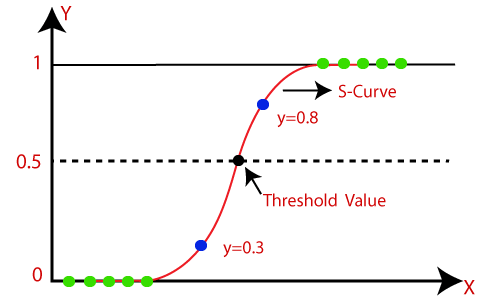



---

For binary classification there is a specialized loss function that Pytorch provides, `loss_function = torch.nn.BCELoss()`.


Training Stopped on Epoch 4651: Loss: 0.2332 Accuracy: 1.0


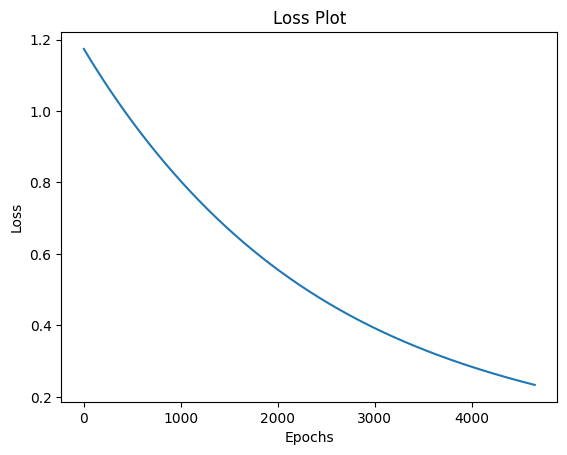

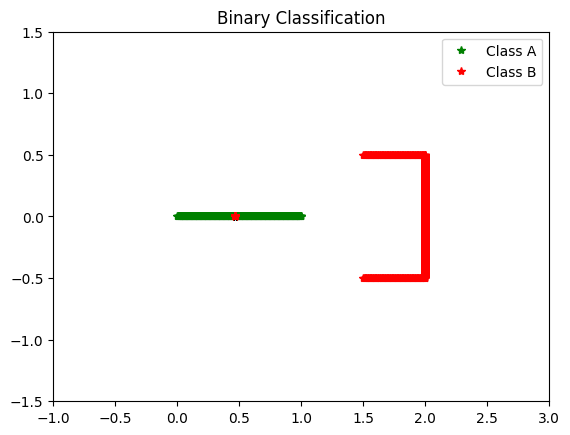

In [ ]:
class LogisticModel(torch.nn.Module):
  """A logistic regression classifier. """

  def __init__(self, num_inputs: int, num_outputs: int, threshold: float):
    super().__init__()

    # --- input layers ---
    self.linear_model = LinearModel(num_inputs, num_outputs) # we can reuse the linear model we aready have
    self.threshold = threshold

  def forward(self, input_values: torch.Tensor) -> torch.Tensor:
    """Applied the linear model and then pass that into the sigmoid function. """
    input_values = self.linear_model(input_values)
    # --- apply the sigmoid function as a composition of functions ---
    return torch.nn.functional.sigmoid(input_values)

  def accuracy(self, prediction, ground_truth):
      return (torch.where(prediction > self.threshold, 1.0, 0.0).long().squeeze() == ground_truth.long()).float().mean()

  def predict(self, input_values):
      return torch.where(self.__call__(input_values) > self.threshold, 1.0, 0.0)

# --- setup toy data ---
num_of_data_points = 400
x1 = np.linspace([0.0, 0.0], [1.0, 0.0], num_of_data_points)
x2 = np.linspace([0.5, 0.5], [1.0, 0.5], num_of_data_points // 4)
x2 = np.append(x2, np.linspace([1.0, 0.5], [1.0, -0.5], num_of_data_points // 2), axis=0)
x2 = np.append(x2, np.linspace([1.0, -0.5], [0.5, -0.5], num_of_data_points // 4), axis=0)
x2 = x2 + [1.0, 0]
x = np.append(x1, x2, axis=0)
y = np.array([1.0] * num_of_data_points)
y = np.append(y, np.array([0.0] * num_of_data_points))
x_min, y_min = np.min(x, axis=0)
x_max, y_max = np.max(x, axis=0)

# --- shuffle the input data ---
indices = np.arange(0, num_of_data_points * 2)
np.random.shuffle(indices)
np.random.shuffle(indices)
np.random.shuffle(indices)
x = x[indices, :]
y = y[indices]

# --- convert to torch ---
x = torch.asarray(x).float()
y = torch.asarray(y).float()

# --- set up the model ---
model = LogisticModel(2, 1, 0.5)

# --- set up the training parameters ---
epochs = 5000
acceptable_accuracy = 0.9999
loss_function = torch.nn.BCELoss() # binary cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

# --- set up the model for training ---
model.train()

# --- track losses ---
losses = []
# --- train the model ---
for epoch in range(epochs):
  # --- zero out the stored gradients --
  optimizer.zero_grad()
  # --- compute the prediction ---
  y_hat = model(x)
  # --- compute the loss ---
  loss = loss_function(y_hat, y.unsqueeze(1))
  # --- compute the gradient of the loss ---
  loss.backward()
  # --- update optimizer ---
  optimizer.step()at helps someone like me who understands the ground level but is less familiar with the tools

  # --- update tracking ---
  losses.append(loss.item())

  # --- accquire the accuracy ---
  accuracy = model.accuracy(y_hat, y)
  if accuracy > acceptable_accuracy:
    break

# --- print the information from training ---
print(f"Training Stopped on Epoch {epoch}: Loss: {loss.sum().item():.4f} Accuracy: {accuracy}")

# --- predict the final output labels ---
model.eval()
labels = model.predict(x).long()

# --- extract the wrongly labeled points ---
incorrect = torch.squeeze(torch.t(torch.argwhere(labels.squeeze() != y.long()))).numpy()
incorrect = list(incorrect)

# --- separate the points based on label ---
green_indices = torch.squeeze(torch.t(torch.argwhere(labels == 1)))
red_indices = torch.squeeze(torch.t(torch.argwhere(labels == 0)))

# --- plot the loss over epochs ---
plt.plot(np.arange(epoch + 1), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.show()

# --- plot the results ---
plt.plot(x[green_indices, 0].flatten().numpy(), x[green_indices, 1].flatten().numpy(), "*g", label="Class A")
plt.plot(x[red_indices, 0].flatten().numpy(), x[red_indices, 1].flatten().numpy(), "*r", label="Class B")
plt.xlim((x_min - 1, x_max + 1))
plt.ylim((y_min - 1, y_max+ 1))
if len(incorrect) > 0:
  inc_counter = 0
  for inc in incorrect:
    if inc_counter == 0:
      plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange", label="Incorrect")
      inc_counter = 1
    else:
      plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange")
plt.legend()
plt.title("Binary Classification")
plt.show()


## **Why Do We Need Deep Learning?**

Every example we have gone through up until this point has been machine learning but not deep learning. Let us discuss briefly what exactly deep learning is.






### **What is Deep Learning?**

Deep learning is simply a sequence of compositions of functions:

$f_{total}(x) = (f_1 \circ f_2 \circ ... \circ f_p)(x) $


-  $(f \circ g) = f(g(x))$
-  $p$ is referred to as the ***depth*** of a network or the ***number of layers***.




### **Depth Reveals Rich Structure**

Understanding now what is meant by a deep architecture, we can highlight some inherent properties of deep architectures:
1. Features in earlier layers represent primitive characteristics of the data while features in latter layers represent complex characteristics with semantic significance to class labels.
2. Deeper architectures can better leverage repeated regularities in the data patterns in order to reduce the computation units and generalize the learning to areas of the data space not observed while training.


### **The Importance of Nonlinearity**


The power of deep architectures is seeded in the application of nonlinear functions to linear mappings. These nonlinear functions are referred to as ***activation functions***. A linear layer that is composed with an activation function can be modeled as:


$ \hat{y} = \phi(\bar{x}\theta^T)$


- $\phi(...)$ is the activation function.


We will discuss activation functions in more detail next session, but for now assume that the activation function named ***ReLU*** is generally a robust nonlinear activation function that's often used.


Some important properties evolve from the use of nonlinear activation functions:


1. A multilayered network that uses only an identity function, i.g. $\phi(z) = z$, in all its layers reduces to a single layer network.
2. Activation functions enable nonlinear mappings of data so that embedded features become linearly separable.







### Linearly Separable

Linearly separable data means that one can fit a hyperplane between different classes of data. If datasets are not convex and/or overlapping then it's impossible to find a linear classifier to perfectly classify the dataset. ***This means that a deep nonlinear architecture can map features into a linear space such that the last layer can use a linear classifier to perfectly classify the original non-linearly separable features.***


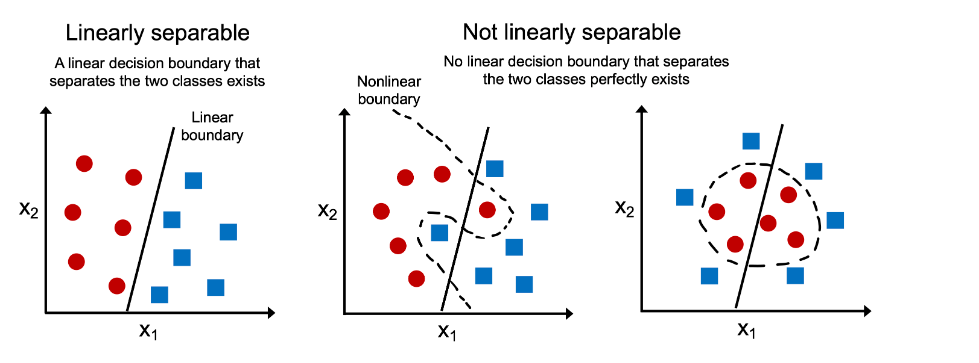

#### *Classification Using a Shallow Architecture*

Let us look at the previous binary classifier and its dataset as an example of when a linear classifier breaks down. This example provides an interactive slider so that we can transform the dataset from linearly separable to non-linearly separable. The closer/more overlapped the two datasets become the more misclassifications that are produced.

In [ ]:
# --- the interactive plotting function ---
def compute_logistic_classifier(distance):
  # --- setup toy data ---
  num_of_data_points = 400
  x1 = np.linspace([0.0, 0.0], [1.0, 0.0], num_of_data_points)
  x2 = np.linspace([0.5, 0.5], [1.0, 0.5], num_of_data_points // 4)
  x2 = np.append(x2, np.linspace([1.0, 0.5], [1.0, -0.5], num_of_data_points // 2), axis=0)
  x2 = np.append(x2, np.linspace([1.0, -0.5], [0.5, -0.5], num_of_data_points // 4), axis=0)
  x2 = x2 + [distance, 0]
  x = np.append(x1, x2, axis=0)
  y = np.array([1.0] * num_of_data_points)
  y = np.append(y, np.array([0.0] * num_of_data_points))
  x_min, y_min = np.min(x, axis=0)
  x_max, y_max = np.max(x, axis=0)

  # --- shuffle the input data ---
  indices = np.arange(0, num_of_data_points * 2)
  np.random.shuffle(indices)
  np.random.shuffle(indices)
  np.random.shuffle(indices)
  x = x[indices, :]
  y = y[indices]

  # --- convert to torch ---
  x = torch.asarray(x).float()
  y = torch.asarray(y).float()

  # --- set up the model ---
  model = LogisticModel(2, 1, 0.5)

  # --- set up the training parameters ---
  epochs = 8000
  acceptable_accuracy = 0.9999
  loss_function = torch.nn.BCELoss() # binary cross entropy loss
  optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)

  # --- set up the model for training ---
  model.train()

  # --- track losses ---
  losses = []
  # --- train the model ---
  for epoch in range(epochs):
    # --- zero out the stored gradients --
    optimizer.zero_grad()
    # --- compute the prediction ---
    y_hat = model(x)
    # --- compute the loss ---
    loss = loss_function(y_hat, y.unsqueeze(1))
    # --- compute the gradient of the loss ---
    loss.backward()
    # --- update optimizer ---
    optimizer.step()

    # --- update tracking ---
    losses.append(loss.item())

    # --- accquire the accuracy ---
    accuracy = model.accuracy(y_hat, y)
    if accuracy > acceptable_accuracy:
      break

  # --- print the information from training ---
  print(f"Training Stopped on Epoch {epoch}: Loss: {loss.sum().item():.4f} Accuracy: {accuracy}")

  # --- predict the final output labels ---
  model.eval()
  labels = model.predict(x).long()

  # --- extract the wrongly labeled points ---
  incorrect = torch.squeeze(torch.t(torch.argwhere(labels.squeeze() != y.long()))).numpy()
  incorrect = list(incorrect)

  # --- separate the points based on label ---
  green_indices = torch.squeeze(torch.t(torch.argwhere(labels == 1)))
  red_indices = torch.squeeze(torch.t(torch.argwhere(labels == 0)))

  # --- plot the loss over epochs ---
  plt.plot(np.arange(epoch + 1), losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Plot")
  plt.show()

  # --- find the hyperplane ---
  with torch.no_grad():
    weights = model.linear_model.theta.flatten().numpy()
    y_min1 = - weights[0] * x_min / weights[1] - model.linear_model.bias.item() / weights[1]
    y_max2 = - weights[0] * x_max / weights[1] - model.linear_model.bias.item() / weights[1]

  # --- plot the results ---
  plt.plot(x[green_indices, 0].flatten().numpy(), x[green_indices, 1].flatten().numpy(), "*g", label="Class A")
  plt.plot(x[red_indices, 0].flatten().numpy(), x[red_indices, 1].flatten().numpy(), "*r", label="Class B")
  plt.plot([x_min, x_max], [y_min1.item(), y_max2.item()], label="Decision Boundary")
  plt.xlim((x_min - 1, x_max + 1))
  plt.ylim((y_min - 1, y_max+ 1))
  if len(incorrect) > 0:
    inc_counter = 0
    for inc in incorrect:
      if inc_counter == 0:
        plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange", label="Incorrect")
        inc_counter = 1
      else:
        plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange")
  plt.legend()
  plt.title("Classified Datasets")
  plt.show()

# --- interactive plot ---
interactive_plt = interactive(compute_logistic_classifier, distance=(0.0, 2.0))
interactive_plt

interactive(children=(FloatSlider(value=1.0, description='distance', max=2.0), Output()), _dom_classes=('widge…

#### *Classification Using a Deep Architecture*
Just as in the previous example an interactive slider is used to transform the dataset from linearly separable to non-linearly separable. This time however, we use a deeper architecture. Instead of the single linear layer used previously, we use four linear layers. Each of the linear layers, besides that last, uses the nonlinear ReLU activation function. This allows each linear layer to nonlinearly map to the next. By the time the last layer is executed we should have transformed into a linearly separable feature space. Then we can use the sigmoid functionality which allows us to produce the probability of the input feature being a positive instance. A positive instance in this case is being labeled as class A. As the datasets move closer and overlap more, the deep architecture is able to maintain its perfect classifier. As we will see in later sessions, this functionality of mapping features into different spaces occurs again and again in deep architectures.


In [ ]:
class MLPBinaryClassifierModel(torch.nn.Module):
  """A Multi-layer binary classifier. """

  def __init__(self, num_inputs: int, num_outputs: int, threshold: float):
      super().__init__()

      # --- set up parameters ---
      self.threshold = threshold
      self.linear1 = torch.nn.Linear(num_inputs, 10, dtype=torch.float)
      self.linear2 = torch.nn.Linear(10, 100, dtype=torch.float)
      self.linear3 = torch.nn.Linear(100, 10, dtype=torch.float)
      self.linear4 = torch.nn.Linear(10, num_outputs, dtype=torch.float)

  def forward(self, input_values: torch.Tensor) -> torch.Tensor:
      """Computes the prediction as a function composition of linear transformation and nonlinear activation functions. """
      input_values = self.linear1(input_values).relu()  # linear transformation followed by the nonlinear mapping
      input_values = self.linear2(input_values).relu()
      input_values = self.linear3(input_values).relu()
      input_values = self.linear4(input_values)
      return torch.nn.functional.sigmoid(input_values)

  def accuracy(self, prediction, ground_truth):
      return (torch.where(prediction > self.threshold, 1.0, 0.0).long().squeeze() == ground_truth.long()).float().mean()

  def predict(self, input_values):
      return torch.where(self.__call__(input_values) > self.threshold, 1.0, 0.0)

def compute_mlp_classifier(distance):
  # --- setup toy data ---
  num_of_data_points = 400
  x1 = np.linspace([0.0, 0.0], [1.0, 0.0], num_of_data_points)
  x2 = np.linspace([0.5, 0.5], [1.0, 0.5], num_of_data_points // 4)
  x2 = np.append(x2, np.linspace([1.0, 0.5], [1.0, -0.5], num_of_data_points // 2), axis=0)
  x2 = np.append(x2, np.linspace([1.0, -0.5], [0.5, -0.5], num_of_data_points // 4), axis=0)
  x2 = x2 + [distance, 0]
  x = np.append(x1, x2, axis=0)
  y = np.array([1.0] * num_of_data_points)
  y = np.append(y, np.array([0.0] * num_of_data_points))
  x_min, y_min = np.min(x, axis=0)
  x_max, y_max = np.max(x, axis=0)

  # --- shuffle the input data ---
  indices = np.arange(0, num_of_data_points * 2)
  np.random.shuffle(indices)
  np.random.shuffle(indices)
  np.random.shuffle(indices)
  x = x[indices, :]
  y = y[indices]

  # --- convert to torch ---
  x = torch.asarray(x).float()
  y = torch.asarray(y).float()

  # --- set up the model ---
  model = MLPBinaryClassifierModel(2, 1, 0.6)

  # --- set up the training parameters ---
  epochs = 5000
  acceptable_accuracy = 0.9999
  loss_function = torch.nn.BCELoss() # binary cross entropy loss
  optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

  # --- set up the model for training ---
  model.train()

  # --- track losses ---
  losses = []
  # --- train the model ---
  for epoch in range(epochs):
    # --- zero out the stored gradients --
    optimizer.zero_grad()
    # --- compute the prediction ---
    y_hat = model(x)
    # --- compute the loss ---
    loss = loss_function(y_hat, y.unsqueeze(1))
    # --- compute the gradient of the loss ---
    loss.backward()
    # --- update optimizer ---
    optimizer.step()

    # --- update tracking ---
    losses.append(loss.item())

    # --- accquire the accuracy ---
    accuracy = model.accuracy(y_hat, y)
    if accuracy > acceptable_accuracy:
      break

  # --- print the information from training ---
  print(f"Training Stopped on Epoch {epoch}: Loss: {loss.sum().item():.4f} Accuracy: {accuracy}")

  # --- predict the final output labels ---
  model.eval()
  labels = model.predict(x).long()

  # --- extract the wrongly labeled points ---
  incorrect = torch.squeeze(torch.t(torch.argwhere(labels.squeeze() != y.long()))).numpy()
  incorrect = list(incorrect)

  # --- separate the points based on label ---
  green_indices = torch.squeeze(torch.t(torch.argwhere(labels == 1)))
  red_indices = torch.squeeze(torch.t(torch.argwhere(labels == 0)))

  # --- plot the loss over epochs ---
  plt.plot(np.arange(epoch + 1), losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss Plot")
  plt.show()

  # --- find the decision boundary ---
  x_grid = np.linspace(x_min - 0.5, x_max + 0.5, 300)
  y_grid = np.linspace(y_min - 0.5, y_max + 0.5, 300)
  X, Y = np.meshgrid(x_grid, y_grid)
  X = X.reshape(-1, 1)
  Y = Y.reshape(-1, 1)
  XY = np.concatenate([X, Y], axis=1)
  label_grid = model(torch.asarray(XY).float()).squeeze(1)
  boundary_indices = torch.argwhere((label_grid < model.threshold + 0.01) & (label_grid > model.threshold - 0.01))
  boundary_points = XY[boundary_indices.numpy()].squeeze(1)
  plt.plot(boundary_points[:, 0], boundary_points[:, 1], "b", label="Decision Boundary")

  # --- plot the results ---
  plt.plot(x[green_indices, 0].flatten().numpy(), x[green_indices, 1].flatten().numpy(), "*g", label="Class A")
  plt.plot(x[red_indices, 0].flatten().numpy(), x[red_indices, 1].flatten().numpy(), "*r", label="Class B")
  plt.xlim((x_min - 1, x_max + 1))
  plt.ylim((y_min - 1, y_max+ 1))
  if len(incorrect) > 0:
    inc_counter = 0
    for inc in incorrect:
      if inc_counter == 0:
        plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange", label="Incorrect")
        inc_counter = 1
      else:
        plt.plot(x[inc, 0], x[inc, 1], marker="o", markersize=12, fillstyle="none", color="orange")
  plt.title("Classified Datasets")
  plt.legend()
  plt.show()

# --- interactive plot ---
interactive_plt = interactive(compute_mlp_classifier, distance=(0.0, 2.0))
interactive_plt

interactive(children=(FloatSlider(value=1.0, description='distance', max=2.0), Output()), _dom_classes=('widge…